# Logistic Regression


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action = 'ignore')
plt.style.use(['seaborn-bright', 'dark_background'])

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/M7T3_helper_text/churn_prediction_simple.csv')
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0,0.0,0,187.0,2,755,224.0,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,6,2531,42,0,2.0,0,1494.0,3,388,58.0,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,7,263,42,1,0.0,0,1096.0,2,1666,60.0,15202.20,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,8,5922,72,0,0.0,1,1020.0,1,1,98.0,7006.93,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,9,1145,46,0,0.0,0,623.0,2,317,172.0,10096.58,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0


In [ ]:
data = data.dropna() # To drop missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22067 entries, 0 to 22066
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     22067 non-null  int64  
 1   vintage                         22067 non-null  int64  
 2   age                             22067 non-null  int64  
 3   gender                          22067 non-null  int64  
 4   dependents                      22067 non-null  float64
 5   occupation                      22067 non-null  int64  
 6   city                            22067 non-null  float64
 7   customer_nw_category            22067 non-null  int64  
 8   branch_code                     22067 non-null  int64  
 9   days_since_last_transaction     22067 non-null  float64
 10  current_balance                 22067 non-null  float64
 11  previous_month_end_balance      22067 non-null  float64
 12  average_monthly_balance_prevQ   

In [ ]:
# checking the dataset distribution


data['churn'].value_counts()/len(data) #dataset imbalance because 80,19

0    0.806317
1    0.193683
Name: churn, dtype: float64

In [ ]:
#separating dependent and independent varibales


X = data.drop(columns = ['churn', 'customer_id'])
Y = data['churn']

In [ ]:
#Scaling the dataset


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [ ]:
#splitting the dataset
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(scaled_X, Y, train_size = 0.80, stratify = Y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((17653, 19), (4414, 19), (17653,), (4414,))

## Model Building, predictions and odds ratio

In [ ]:
from sklearn.linear_model import LogisticRegression as LR
classifier = LR(class_weight = 'balanced')

In [ ]:
classifier.fit(x_train, y_train)
predicted_values = classifier.predict(x_test)              # Predicting class
predicted_probabilities = classifier.predict_proba(x_test) # Predicting probabilities

In [ ]:
predicted_values

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:

predicted_probabilities, predicted_probabilities.shape

(array([[0.61749469, 0.38250531],
        [0.60552621, 0.39447379],
        [0.42011544, 0.57988456],
        ...,
        [0.50028982, 0.49971018],
        [0.43581701, 0.56418299],
        [0.56192188, 0.43807812]]), (4414, 2))

In [ ]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, predicted_values)
cf

array([[2681,  878],
       [ 294,  561]])

In [ ]:
#Accuracy

classifier.score(x_test, y_test)

0.7344811961939284

In [ ]:
#calculating the precision score

from sklearn.metrics import precision_score
Precision = precision_score(y_test, predicted_values)
Precision

0.3898540653231411

In [ ]:
#calculating recall score

from sklearn.metrics import recall_score
Recall = recall_score(y_test, predicted_values)
Recall

0.656140350877193

In [ ]:
# manually calculating the f1 score

f1 = 2/((1/Precision)+(1/Recall))
f1

0.48910200523103753

In [ ]:
#calculating the f1-score

from sklearn.metrics import f1_score
F1 = f1_score(y_test, predicted_values)
F1

0.48910200523103753

In [ ]:
#calculating precision, recall, f1-score and support at once.


from sklearn.metrics import precision_recall_fscore_support as PRF_summary
precision, recall, f1, support = PRF_summary(y_test, predicted_values) 

In [ ]:
precision

array([0.90117647, 0.38985407])

In [ ]:
recall

array([0.75330149, 0.65614035])

In [ ]:
f1

array([0.82063055, 0.48910201])

In [ ]:
support #the number of instances for the class 1 and class 0

array([3559,  855])

In [ ]:
#classification_report this function is only meaant for representation purpose 

from sklearn.metrics import classification_report
k = classification_report(y_test, predicted_values)
print(k)

              precision    recall  f1-score   support

           0       0.90      0.75      0.82      3559
           1       0.39      0.66      0.49       855

    accuracy                           0.73      4414
   macro avg       0.65      0.70      0.65      4414
weighted avg       0.80      0.73      0.76      4414



## Precision-Recall Curve

In [ ]:
# gathering Precision/recall scores for different thresholds
# it calculate the precision and recall for every threshold possible between the probablities 0 and 1

from sklearn.metrics import precision_recall_curve
precision_points, recall_points, threshold_points = precision_recall_curve(y_test, predicted_probabilities[:,1])
precision_points.shape, recall_points.shape, threshold_points.shape

((4415,), (4415,), (4414,))

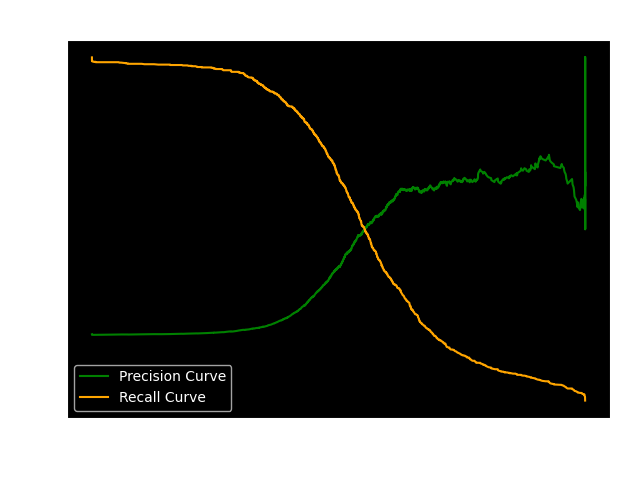

In [ ]:
plt.figure(figsize = (7,5), dpi = 100)
plt.plot( threshold_points, precision_points[:-1], color = 'green', label = 'Precision Curve')
plt.plot( threshold_points, recall_points[:-1], color = 'orange', label = 'Recall Curve')
plt.xlabel('Threshold Points', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.title('Precision-Recall tradeoff', fontsize = 20)
plt.legend()


## AUC-ROC Curve

In [ ]:
from sklearn.metrics import roc_curve , roc_auc_score                 
fpr, tpr, threshold = roc_curve(y_test, predicted_probabilities[:,1])


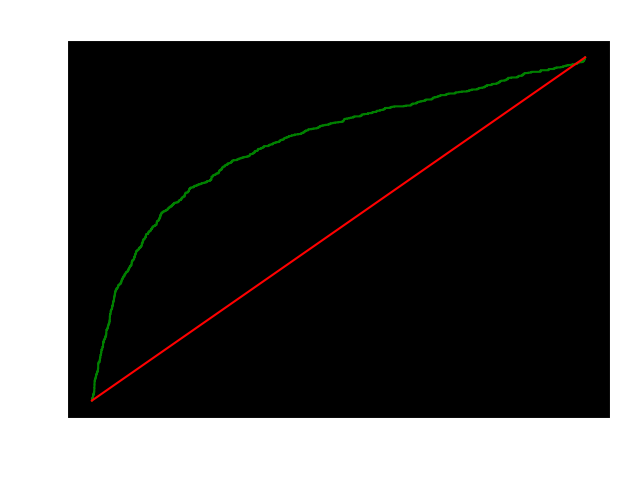

0.7525492573805967

In [ ]:
plt.figure(figsize = (7,5), dpi = 100)
plt.plot( fpr, tpr, color = 'green')
plt.plot( [0,1], [0,1], label = 'baseline', color = 'red')
plt.xlabel('FPR', fontsize = 15)
plt.ylabel('TPR', fontsize = 15)
plt.title('AUC-ROC', fontsize = 20)
plt.show()
roc_auc_score(y_test, predicted_probabilities[:,1])

## Coefficient Plot

In [ ]:
# arranging the data

c = classifier.coef_.reshape(-1)
x = X.columns

coeff_plot = pd.DataFrame( {
                            'coefficients': c,
                            'variable' : x
                            })

In [ ]:
# sorting the values
coeff_plot = coeff_plot.sort_values(by = 'coefficients')
coeff_plot.head()

,coefficients,variable
9,-3.424127,current_balance
13,-0.567972,current_month_credit
10,-0.325414,previous_month_end_balance
12,-0.218049,average_monthly_balance_prevQ2
18,-0.198362,previous_month_balance


Text(0.5, 1.0, 'Coefficient plot')

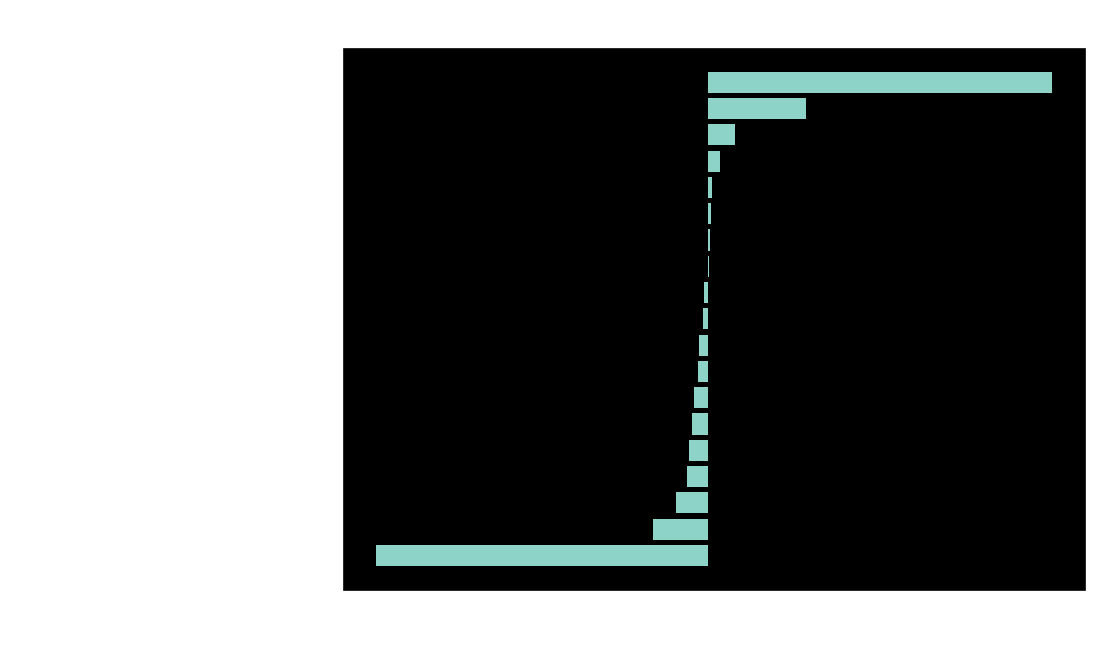

In [ ]:
plt.figure(figsize=(8, 6), dpi=120)
plt.barh( coeff_plot['variable'] , coeff_plot['coefficients'] )
plt.xlabel( "Coefficient Magnitude", fontsize = 15)
plt.ylabel('Variables', fontsize = 15)
plt.title('Coefficient plot', fontsize = 20)